In [1]:
from MLP import MPLArgs, splitDataSet, trainModel, predict
from MLPComparator import MLPComparator

In [2]:
mlp = MPLArgs(**{"steps":[1, 2],
        "dataset":"../data/data.csv",
        "layer":[8, "sigmoid", 8, "sigmoid", 2, "softmax"],
        "epochs":0,
        "resetTraining":True, 
        "precisionRecall":True
        })

In [3]:
splitDataSet(mlp)

Splitting the dataset:
     x_train shape : (455, 30)
     x_valid shape : (114, 30)
Saving training set in data_train.csv
Saving validation set in data_val.csv



# Test avec plusieurs learning rates

In [4]:
mlp2 = MPLArgs(**{"steps":[2],
        "layer":[8, "sigmoid", 8, "sigmoid", 2, "softmax"],
        "epochs":200,
        "learningRate":0.1,
        "resetTraining":True, 
        "earlyStop":True,
        "precisionRecall":True
        })

In [5]:
mlp3 = MPLArgs(**{"steps":[2],
        "layer":[8, "sigmoid", 8, "sigmoid", 2, "softmax"],
        "epochs":350,
        "learningRate":0.015,
        "resetTraining":True, 
        "precisionRecall":True
        })

In [6]:
trainModel(mlp)

Creating new Neural Network:
----------- Layer 1 -----------
Layer Name: Dense 1
Shape W: (30, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 2 -----------
Layer Name: Dense 2
Shape W: (8, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 3 -----------
Layer Name: Dense 3
Shape W: (8, 2)
Shape b: (1, 2)
activation: softmax
weights_initializer: heUniformWI 


Model savec in saved_model.pkl 



In [7]:
trainModel(mlp2)

Creating new Neural Network:
----------- Layer 1 -----------
Layer Name: Dense 1
Shape W: (30, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 2 -----------
Layer Name: Dense 2
Shape W: (8, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 3 -----------
Layer Name: Dense 3
Shape W: (8, 2)
Shape b: (1, 2)
activation: softmax
weights_initializer: heUniformWI 

epoch 1/200 : accuracy: 65.05%, loss: 0.592, precision: 100.0%, recall: 4.79%, val_precision: 100.0%, val_recall: 6.67%, val_accuracy: 63.16%, val_loss: 0.597
epoch 2/200 : accuracy: 76.26%, loss: 0.522, precision: 100.0%, recall: 35.33%, val_precision: 100.0%, val_recall: 40.0%, val_accuracy: 76.32%, val_loss: 0.523
epoch 3/200 : accuracy: 84.4%, loss: 0.456, precision: 98.0%, recall: 58.68%, val_precision: 100.0%, val_recall: 62.22%, val_accuracy: 85.09%, val_loss: 0.451
epoch 4/200 : accuracy: 90.11%, loss: 0.396, precision: 95.52%, recall: 76.

In [8]:
trainModel(mlp3)

Creating new Neural Network:
----------- Layer 1 -----------
Layer Name: Dense 1
Shape W: (30, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 2 -----------
Layer Name: Dense 2
Shape W: (8, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 3 -----------
Layer Name: Dense 3
Shape W: (8, 2)
Shape b: (1, 2)
activation: softmax
weights_initializer: heUniformWI 

epoch 1/350 : accuracy: 55.6%, loss: 0.688, precision: 40.11%, recall: 42.51%, val_precision: 44.68%, val_recall: 46.67%, val_accuracy: 56.14%, val_loss: 0.682
epoch 2/350 : accuracy: 65.27%, loss: 0.646, precision: 100.0%, recall: 5.39%, val_precision: 100.0%, val_recall: 6.67%, val_accuracy: 63.16%, val_loss: 0.649
epoch 3/350 : accuracy: 64.18%, loss: 0.631, precision: 100.0%, recall: 2.4%, val_precision: 100.0%, val_recall: 2.22%, val_accuracy: 61.4%, val_loss: 0.637
epoch 4/350 : accuracy: 64.4%, loss: 0.62, precision: 100.0%, recall: 2.99%, 

In [9]:
savedModel_learningRate = MLPComparator()
savedModel_learningRate.addNewModel(mlp)
savedModel_learningRate.addNewModel(mlp2)
savedModel_learningRate.addNewModel(mlp3)

Model 1:
[8 sigmoid heUniformWI | 8 sigmoid heUniformWI | 2 softmax heUniformWI]
loss: binaryCrossentropy, alpha: 0.0314, batch size: 8

Model 2:
[8 sigmoid heUniformWI | 8 sigmoid heUniformWI | 2 softmax heUniformWI]
loss: binaryCrossentropy, alpha: 0.1, batch size: 8

Model 3:
[8 sigmoid heUniformWI | 8 sigmoid heUniformWI | 2 softmax heUniformWI]
loss: binaryCrossentropy, alpha: 0.015, batch size: 8




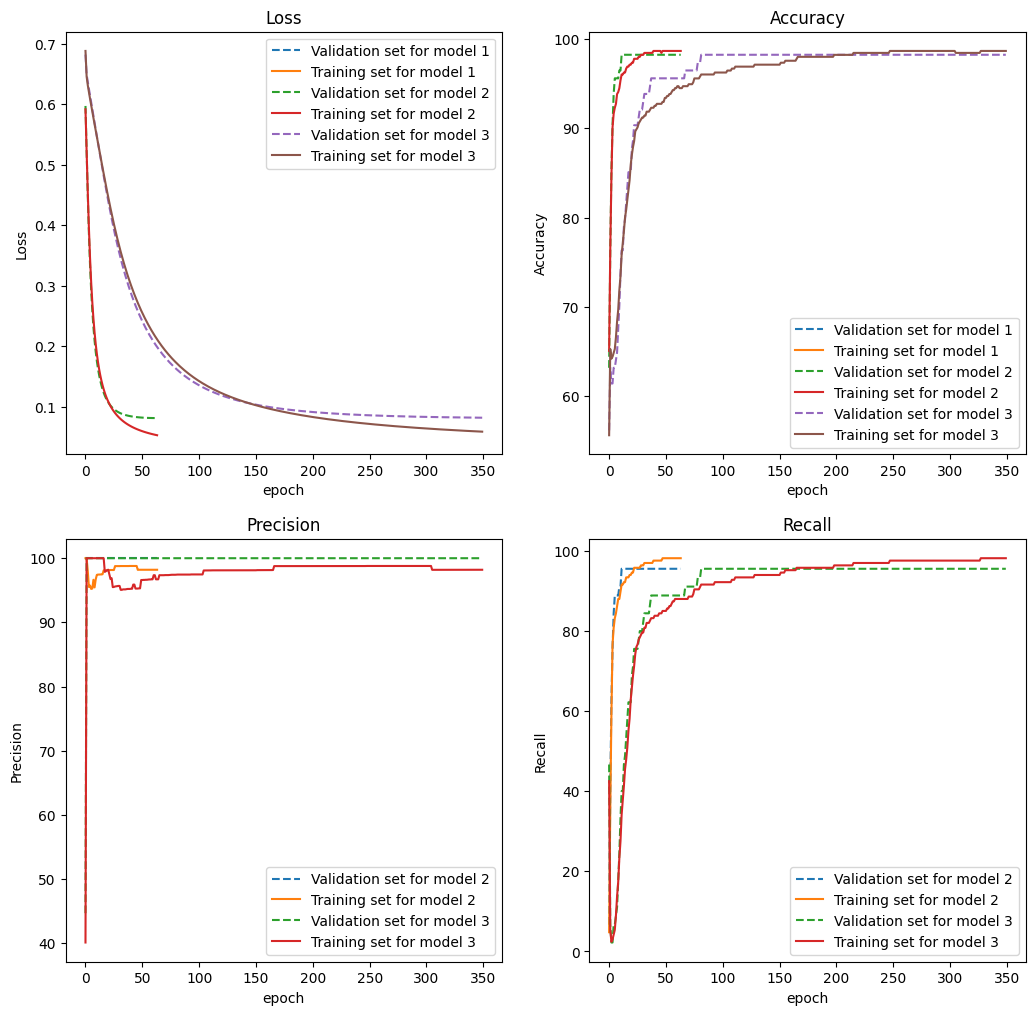

In [10]:
savedModel_learningRate.printComparisonGraphs()

Le model 2 n'est pas bon car la loss du validation set remonte. Les models 1 et 3 convergent vers la meme valeur mais le model 1 est plus rapide pour converger. 

=> On reste sur un learning rate de 0.0314

# Test de differentes tailles de batch

In [11]:
mlp4 = MPLArgs(**{"steps":[2],
        "layer":[8, "sigmoid", 8, "sigmoid", 2, "softmax"],
        "epochs":200,
        "batchSize":16,
        "resetTraining":True
        })

mlp5 = MPLArgs(**{"steps":[2],
        "layer":[8, "sigmoid", 8, "sigmoid", 2, "softmax"],
        "epochs":200,
        "batchSize":32,
        "resetTraining":True
        })

In [12]:
trainModel(mlp4)
trainModel(mlp5)

Creating new Neural Network:
----------- Layer 1 -----------
Layer Name: Dense 1
Shape W: (30, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 2 -----------
Layer Name: Dense 2
Shape W: (8, 8)
Shape b: (1, 8)
activation: sigmoid
weights_initializer: heUniformWI 

----------- Layer 3 -----------
Layer Name: Dense 3
Shape W: (8, 2)
Shape b: (1, 2)
activation: softmax
weights_initializer: heUniformWI 

epoch 1/200 : accuracy: 64.84%, loss: 0.657, val_accuracy: 61.4%, val_loss: 0.661
epoch 2/200 : accuracy: 63.3%, loss: 0.641, val_accuracy: 60.53%, val_loss: 0.648
epoch 3/200 : accuracy: 63.74%, loss: 0.628, val_accuracy: 61.4%, val_loss: 0.634
epoch 4/200 : accuracy: 64.4%, loss: 0.615, val_accuracy: 61.4%, val_loss: 0.62
epoch 5/200 : accuracy: 65.05%, loss: 0.602, val_accuracy: 63.16%, val_loss: 0.607
epoch 6/200 : accuracy: 66.15%, loss: 0.59, val_accuracy: 64.04%, val_loss: 0.594
epoch 7/200 : accuracy: 68.13%, loss: 0.577, val_accuracy: 64.

In [13]:
savedModel_batch = MLPComparator()
savedModel_batch.addNewModel(mlp)
savedModel_batch.addNewModel(mlp4)
savedModel_batch.addNewModel(mlp5)

Model 1:
[8 sigmoid heUniformWI | 8 sigmoid heUniformWI | 2 softmax heUniformWI]
loss: binaryCrossentropy, alpha: 0.0314, batch size: 8

Model 2:
[8 sigmoid heUniformWI | 8 sigmoid heUniformWI | 2 softmax heUniformWI]
loss: binaryCrossentropy, alpha: 0.0314, batch size: 16

Model 3:
[8 sigmoid heUniformWI | 8 sigmoid heUniformWI | 2 softmax heUniformWI]
loss: binaryCrossentropy, alpha: 0.0314, batch size: 32




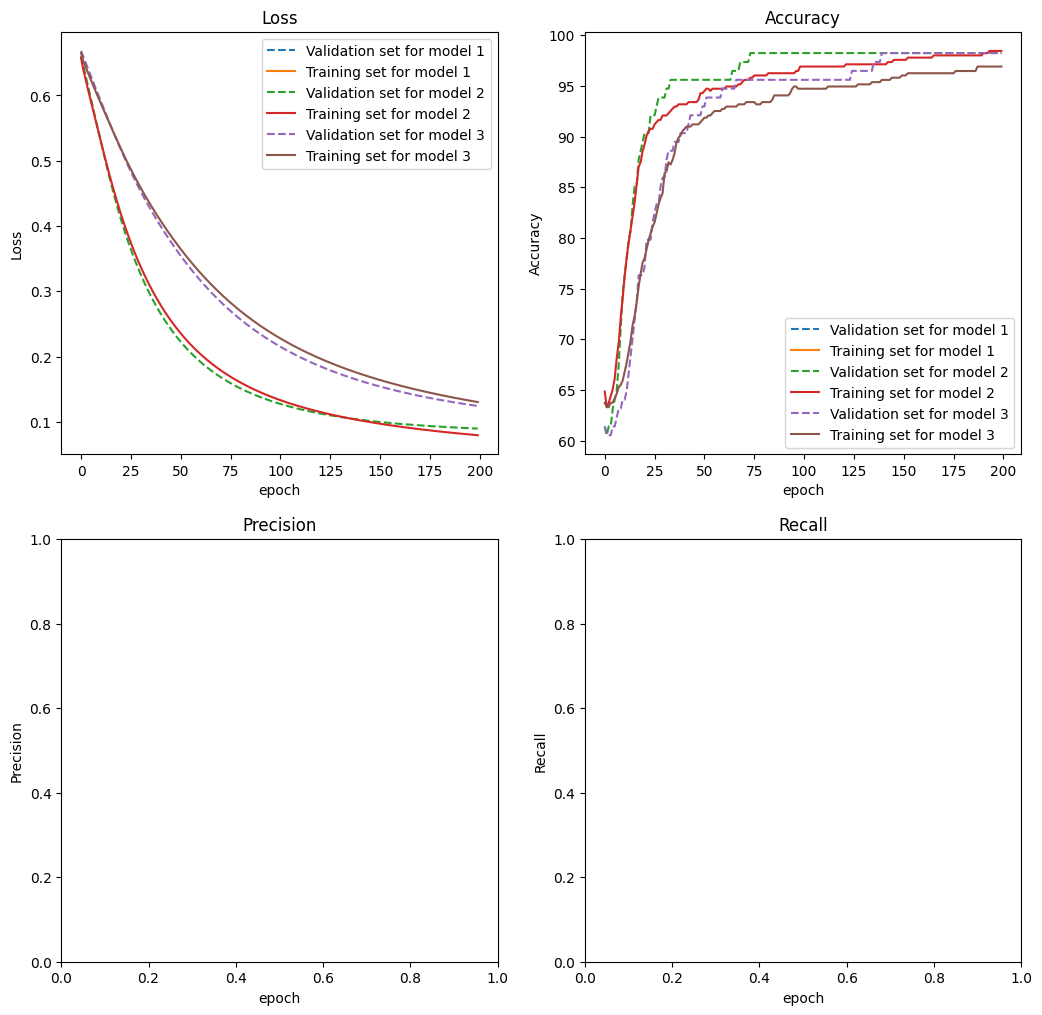

In [14]:
savedModel_batch.printComparisonGraphs()